In [ ]:
# CLASE 1

# IMPORTACION DE LIBRERIAS
import numpy as np
import pandas as pd

# LIBRERIAS PARA HACER GRAFICOS
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as xp

#LIBRERIAS PARA CARGAR DATOS EN COLAB
from google.colab import files
import io

In [3]:
# 2 - CARGA DEL FICHERO DE DATOS
#Cargamos los datos desde local
uploaded = {}
uploaded = files.upload()
data = pd.read_csv(io.BytesIO(uploaded['ASI_casoPractico.csv']), sep= ';')

data.head()

Saving ASI_casoPractico.csv to ASI_casoPractico.csv


,ID,b,e,LBE,AC,FM,UC,ASTV,MSTV,ALTV,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,1,240,357,120,0,0,0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,1
1,2,5,632,132,4,0,4,17,2.1,0,...,68,198,6,1,141,136,140,12,0,0
2,3,177,779,133,2,0,5,16,2.1,0,...,68,198,5,1,141,135,138,13,0,0
3,4,411,1192,134,2,0,6,16,2.4,0,...,53,170,11,0,137,134,137,13,1,0
4,5,533,1147,132,4,0,5,16,2.4,0,...,53,170,9,0,137,136,138,11,1,0


In [4]:
# 2 - INFORMACION DEL CONJUNTO DE DATOS
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 26 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2126 non-null   int64  
 1   b         2126 non-null   int64  
 2   e         2126 non-null   int64  
 3   LBE       2126 non-null   int64  
 4   AC        2126 non-null   int64  
 5   FM        2126 non-null   int64  
 6   UC        2126 non-null   int64  
 7   ASTV      2126 non-null   int64  
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   int64  
 10  MLTV      2126 non-null   float64
 11  DL        2126 non-null   int64  
 12  DS        2126 non-null   int64  
 13  DP        2126 non-null   int64  
 14  DR        2126 non-null   int64  
 15  Width     2126 non-null   int64  
 16  Min       2126 non-null   int64  
 17  Max       2126 non-null   int64  
 18  Nmax      2126 non-null   int64  
 19  Nzeros    2126 non-null   int64  
 20  Mode      2126 non-null   int6

In [5]:
# 2 - NUMERO DE VALORES UNICOS PARA CADA VARIABLE
data.agg(['nunique']).T

,nunique
ID,2126
b,979
e,1064
LBE,48
AC,22
FM,96
UC,19
ASTV,75
MSTV,57
ALTV,87


In [6]:
# 2 -ELIMINAR COUMNAS NO NECESARIAS
data = data.drop(["ID","b","e","DR"], axis = 1)
data.head()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
0,120,0,0,0,73,0.5,43,2.4,0,0,...,62,126,2,0,120,137,121,73,1,1
1,132,4,0,4,17,2.1,0,10.4,2,0,...,68,198,6,1,141,136,140,12,0,0
2,133,2,0,5,16,2.1,0,13.4,2,0,...,68,198,5,1,141,135,138,13,0,0
3,134,2,0,6,16,2.4,0,23.0,2,0,...,53,170,11,0,137,134,137,13,1,0
4,132,4,0,5,16,2.4,0,19.9,0,0,...,53,170,9,0,137,136,138,11,1,0


In [7]:
# 3 - ANALISIS DESCRIPTIVO - NULOS
data.isnull().sum()

,0
LBE,0
AC,0
FM,0
UC,0
ASTV,0
MSTV,0
ALTV,0
MLTV,0
DL,0
DS,0


In [15]:
# 3 - MEDIDAS DE CENTRALIZACION, LOCALIZACION Y DISPERSION
data.describe()

,LBE,AC,FM,UC,ASTV,MSTV,ALTV,MLTV,DL,DS,...,Min,Max,Nmax,Nzeros,Mode,Mean,Median,Variance,Tendency,Target
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,2126.000000,2126.000000,2126.000000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,2.722484,7.241298,3.659925,46.990122,1.332785,9.84666,8.187629,1.570085,0.003293,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,0.221543
std,9.840844,3.560850,37.125309,2.847094,17.192814,0.883241,18.39688,5.628247,2.499229,0.057300,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.415383
min,106.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,0.000000,0.000000,0.000000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,0.000000
25%,126.000000,0.000000,0.000000,1.000000,32.000000,0.700000,0.00000,4.600000,0.000000,0.000000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,0.000000
50%,133.000000,1.000000,0.000000,3.000000,49.000000,1.200000,0.00000,7.400000,0.000000,0.000000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,0.000000
75%,140.000000,4.000000,2.000000,5.000000,61.000000,1.700000,11.00000,10.800000,3.000000,0.000000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,0.000000
max,160.000000,26.000000,564.000000,23.000000,87.000000,7.000000,91.00000,50.700000,16.000000,1.000000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,1.000000


In [22]:
data[['FM', 'ALTV','Median']].describe()

,FM,ALTV,Median
count,2126.000000,2126.00000,2126.000000
mean,7.241298,9.84666,138.090310
std,37.125309,18.39688,14.466589
min,0.000000,0.00000,77.000000
25%,0.000000,0.00000,129.000000
50%,0.000000,0.00000,139.000000
75%,2.000000,11.00000,148.000000
max,564.000000,91.00000,186.000000


Target
0    1655
1     471
Name: count, dtype: int64


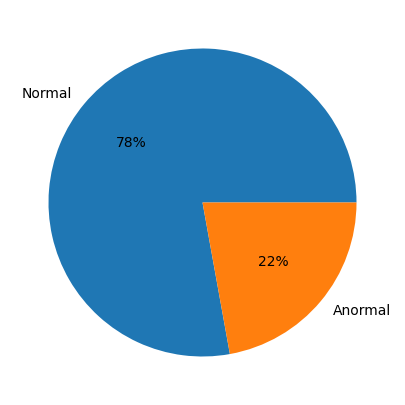

In [9]:
# 3 - DISTRIBUCION DE FRECUENCIAS DEL TARGET
a, b = data['Target'].value_counts()
plt.figure(figsize = (13,5))
plt.subplot(121)
plt.pie([a, b], labels=["Normal", "Anormal"], autopct="%1.0f%%")
print(data["Target"].value_counts())

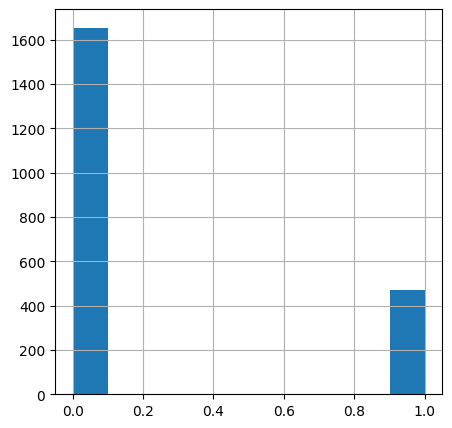

In [10]:
# 3 - HISTOGRAMA
fig, ax = plt.subplots(1,1,figsize=(5,5))
#plt.style.use("seaborn")
data['Target'].hist(ax=ax);

Text(0.5, 1.0, 'Histograma LBE')

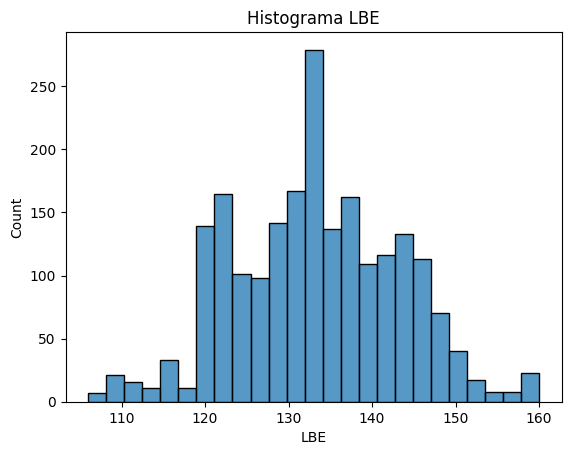

In [38]:
#HISTOGRAMA LBE
sns.histplot(data = data, x = 'LBE')
plt.title('Histograma LBE')

Text(0.5, 1.0, 'Histograma DS')

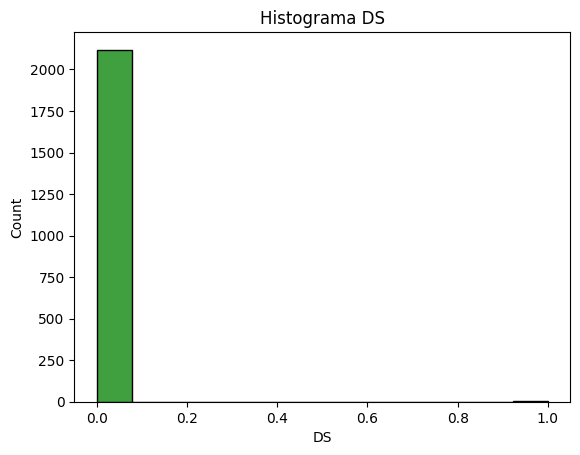

In [32]:
# HISTOGRAMA DS
sns.histplot(data = data, x = 'DS', color = 'g')
plt.title('Histograma DS')

Text(0.5, 1.0, 'Histograma Min')

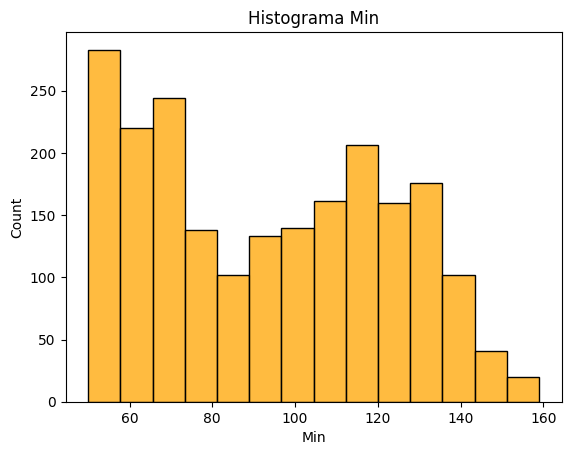

In [39]:
#HISTOGRAMA Min
sns.histplot(data = data, x = 'Min', color = 'orange')
plt.title('Histograma Min')

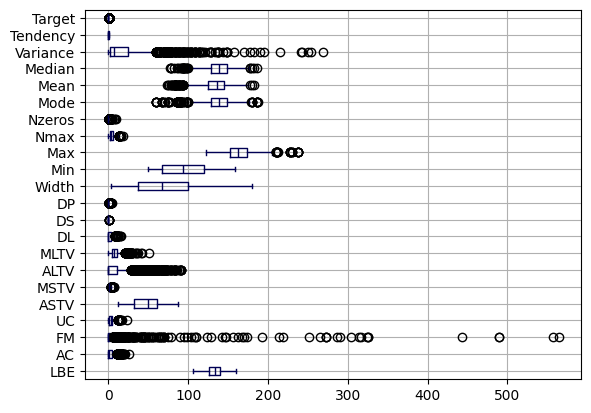

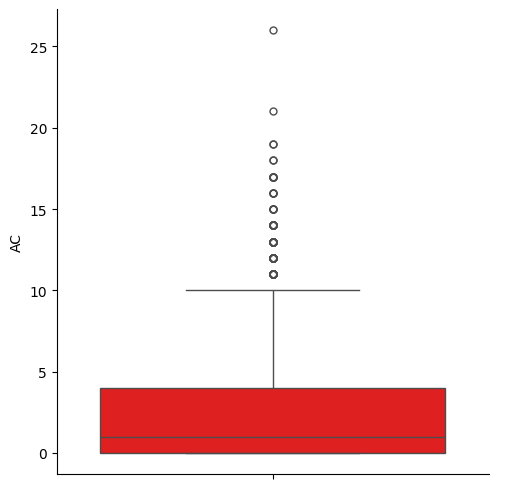

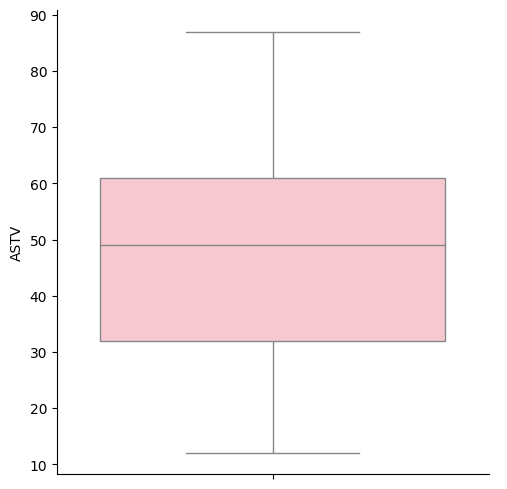

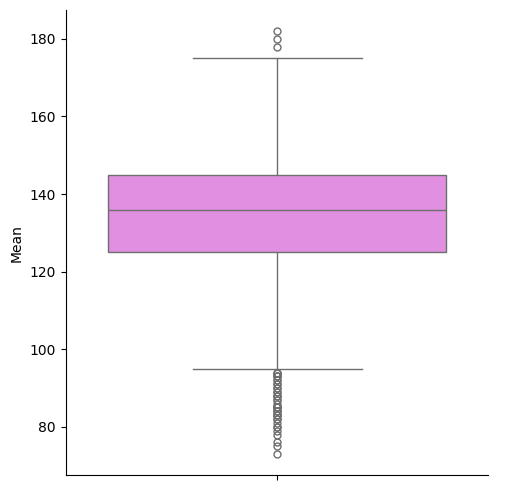

In [34]:
# BOX PLOT
data_box_plot = data.boxplot(vert=False, color = "#000054")





Text(0.5, 1.0, 'Boxplot AC')

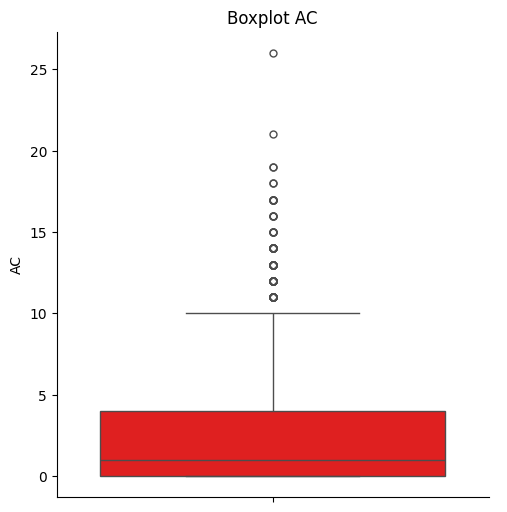

In [35]:
sns.catplot(y= "AC" , kind="box", data=data, color= 'r')
plt.title('Boxplot AC')

Text(0.5, 1.0, 'Boxplot ASTV')

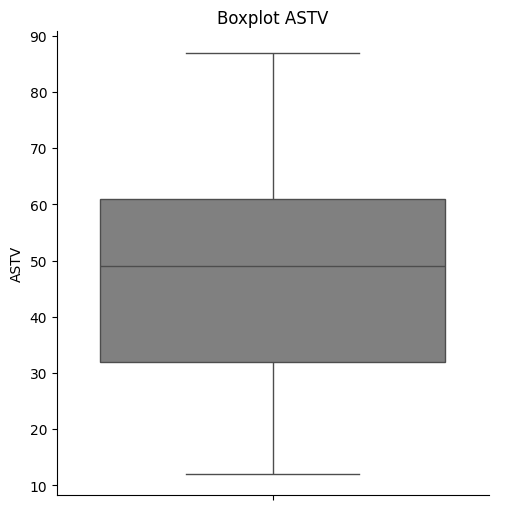

In [36]:
sns.catplot(y= "ASTV" , kind="box", data=data, color= 'grey')
plt.title('Boxplot ASTV')

Text(0.5, 1.0, 'Boxplot Mean')

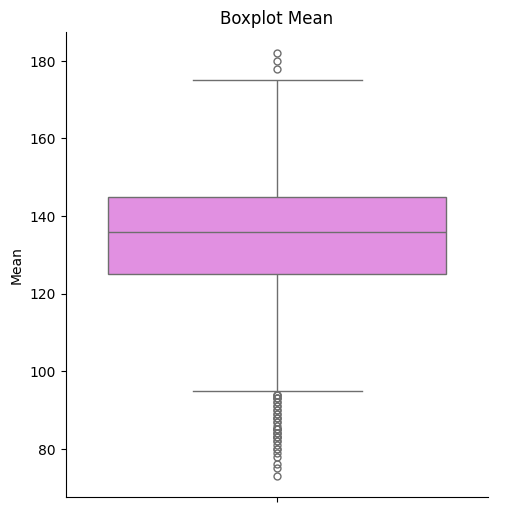

In [37]:
sns.catplot(y= "Mean" , kind="box", data=data, color = 'violet')
plt.title('Boxplot Mean')